<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Classification/Data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# **class**
```
* (0) good       44414
* (1) bad         8206
```



In [3]:
df['Group'].value_counts()

good    44414
bad      8206
Name: Group, dtype: int64

In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_2_Group_5_Fold.xlsx')
df = df.iloc[:, 1:]
df

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,good,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,bad,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,good,1
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,good,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,bad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,good,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,good,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,bad,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,good,2


In [4]:
data = df.copy()

In [5]:
data = data.sort_values(['PatientUID', 'PatientVisitUID'])
data['TimeDiff'] = data.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data['TimeDiff'] = data['TimeDiff'].fillna(0)

In [6]:
data['time_t1'] = pd.to_datetime(data['time_t1'])

In [7]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data[column].unique())}
    data[column] = data[column].map(encoding_map)

In [8]:
data.head(3)

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold,TimeDiff
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,0,2016-08-15 08:13:26.043,...,5.284,215.0,81.0,123.0,99.0,21.019,1,0,1,0.000000
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,0,2017-10-03 07:37:22.777,...,5.755,219.0,64.0,146.0,73.0,15.198,1,1,1,1.131507
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,0,2018-12-12 07:58:57.190,...,5.300,193.0,62.0,129.0,65.0,30.879,1,0,1,1.191781


In [9]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'VisitLocation', 'LabLocation','Fold'], axis=1)
y = data['Group']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)  # Set shuffle to True

# Get the unique fold values
all_folds = data['Fold'].unique()

X_train_scaled_list = []
y_train_list = []  # List to store y_train for each fold
X_test_scaled_list = []  # List to store X_test_scaled for each fold
y_test_list = []  # List to store y_test for each fold

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == val_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # Store the scaled data for each fold
    X_train_scaled_list.append(X_train_scaled)
    y_train_list.append(y_train)
    X_test_scaled_list.append(X_test_scaled)
    y_test_list.append(y_test)

# Access the X_train_scaled and y_train for each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
    zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices

    print(f"Fold {fold + 1}:")
    print(f"Training set size : {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")

Fold 1:
Training set size : (42027, 74)
Test set size: (10593, 74)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Fold 2:
Training set size : (42017, 74)
Test set size: (10603, 74)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Fold 3:
Training set size : (42184, 74)
Test set size: (10436, 74)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Fold 4:
Training set size : (42274, 74)
Test set size: (10346, 74)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Fold 5:
Training set size : (41978, 74)
Test set size: (10642, 74)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---



In [10]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(41978, 74)
(10642, 74)
(41978,)
(10642,)


# **Define**

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [12]:
X = data.drop(['Group','time_t1','StartDTTM','EndDttm','LabCwhen'], axis=1)
y = data['Group']

## **epoch 30**

In [14]:
label_encoder = LabelEncoder()
data['Group'] = label_encoder.fit_transform(data['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
all_folds = data['Fold'].unique()

accuracy_per_fold = []
conf_mat_list = []

precision_per_fold = []
recall_per_fold = []
f1_per_fold = []

loss_per_fold = []
all_train_loss = []
all_val_loss = []

# Create an instance of SMOTE
smote = SMOTE()

In [15]:
for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Apply SMOTE only on the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # scale
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # encode y_train and y_test
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_resampled)
    y_test_encoded = label_encoder.transform(y_test)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=2)

    model0 = Sequential([
        Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model0.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model0.fit(X_train_scaled, y_train_one_hot,
                        batch_size=500,
                        epochs=30,
                        verbose=0,
                        validation_data=(X_test_scaled, y_test_one_hot))

    # Evaluate on train set
    scores = model0.evaluate(X_test_scaled, y_test_one_hot, verbose=0)
    loss_per_fold.append(scores[0])

    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

    y_pred = model0.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)
    conf_mat = confusion_matrix(y_test_encoded, y_pred_classes)
    conf_mat_list.append(conf_mat)


    accuracy = accuracy_score(y_test_encoded, y_pred_classes)
    precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
    recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')

    accuracy_per_fold.append(accuracy)
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_per_fold.append(f1)

    print(f"Fold {fold + 1} - Loss: {loss_per_fold[-1]:.4f}, Accuracy: {accuracy_per_fold[-1]*100:.2f}%")
    print(f"Precision: {precision_per_fold[-1]:.4f}, Recall: {recall_per_fold[-1]:.4f}, F1-Score: {f1_per_fold[-1]:.4f}")

324/324 [==============================] - 1s 2ms/step
Fold 1 - Loss: 0.0238, Accuracy: 99.08%
Precision: 0.9908, Recall: 0.9908, F1-Score: 0.9908
333/333 [==============================] - 1s 1ms/step
Fold 2 - Loss: 0.0217, Accuracy: 99.04%
Precision: 0.9905, Recall: 0.9904, F1-Score: 0.9904
332/332 [==============================] - 1s 1ms/step
Fold 3 - Loss: 0.0234, Accuracy: 99.02%
Precision: 0.9902, Recall: 0.9902, F1-Score: 0.9902
327/327 [==============================] - 1s 1ms/step
Fold 4 - Loss: 0.0255, Accuracy: 99.12%
Precision: 0.9912, Recall: 0.9912, F1-Score: 0.9912
332/332 [==============================] - 2s 4ms/step
Fold 5 - Loss: 0.0375, Accuracy: 98.87%
Precision: 0.9887, Recall: 0.9887, F1-Score: 0.9886


In [20]:
X_train_resampled['NATNL'].value_counts()

0    70411
1      190
2      165
3      140
Name: NATNL, dtype: int64

In [21]:
X_train_resampled['Sex'].value_counts()

0    43799
1    27107
Name: Sex, dtype: int64

In [24]:
X_train_resampled['LabLocation'].value_counts()

0    37366
1    33540
Name: LabLocation, dtype: int64

In [26]:
X_train_resampled['VisitLocation'].value_counts()

3      9915
8      5444
0      5134
1      4858
7      3177
       ... 
180       1
179       1
152       1
171       1
183       1
Name: VisitLocation, Length: 187, dtype: int64

In [19]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70906 entries, 0 to 70905
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PatientUID                    70906 non-null  int64  
 1   PatientVisitUID               70906 non-null  int64  
 2   Slopes                        70906 non-null  float64
 3   InPatient                     70906 non-null  int64  
 4   OutPatient                    70906 non-null  int64  
 5   Emergency                     70906 non-null  int64  
 6   eGFR_t1                       70906 non-null  float64
 7   VisitLocation                 70906 non-null  int64  
 8   G1M2-ARB                      70906 non-null  int64  
 9   G3M1-Statin                   70906 non-null  int64  
 10  G5M2-NSAIDs                   70906 non-null  int64  
 11  G1M5-Diuretic                 70906 non-null  int64  
 12  G1M7-Beta-blocker             70906 non-null  int64  
 13  G

In [16]:
from collections import Counter

print("Class distribution in y_train_resampled:", Counter(y_train_resampled))
print("Class distribution in y_test:", Counter(y_test))

Class distribution in y_train_resampled: Counter({0: 35453, 1: 35453})
Class distribution in y_test: Counter({0: 8961, 1: 1632})


In [27]:
y_pred

array([[9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 3.3320933e-17],
       [9.9999994e-01, 0.0000000e+00],
       ...,
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [1.0000000e+00, 4.0757486e-33]], dtype=float32)

In [28]:
y_test_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0])

### **plot**

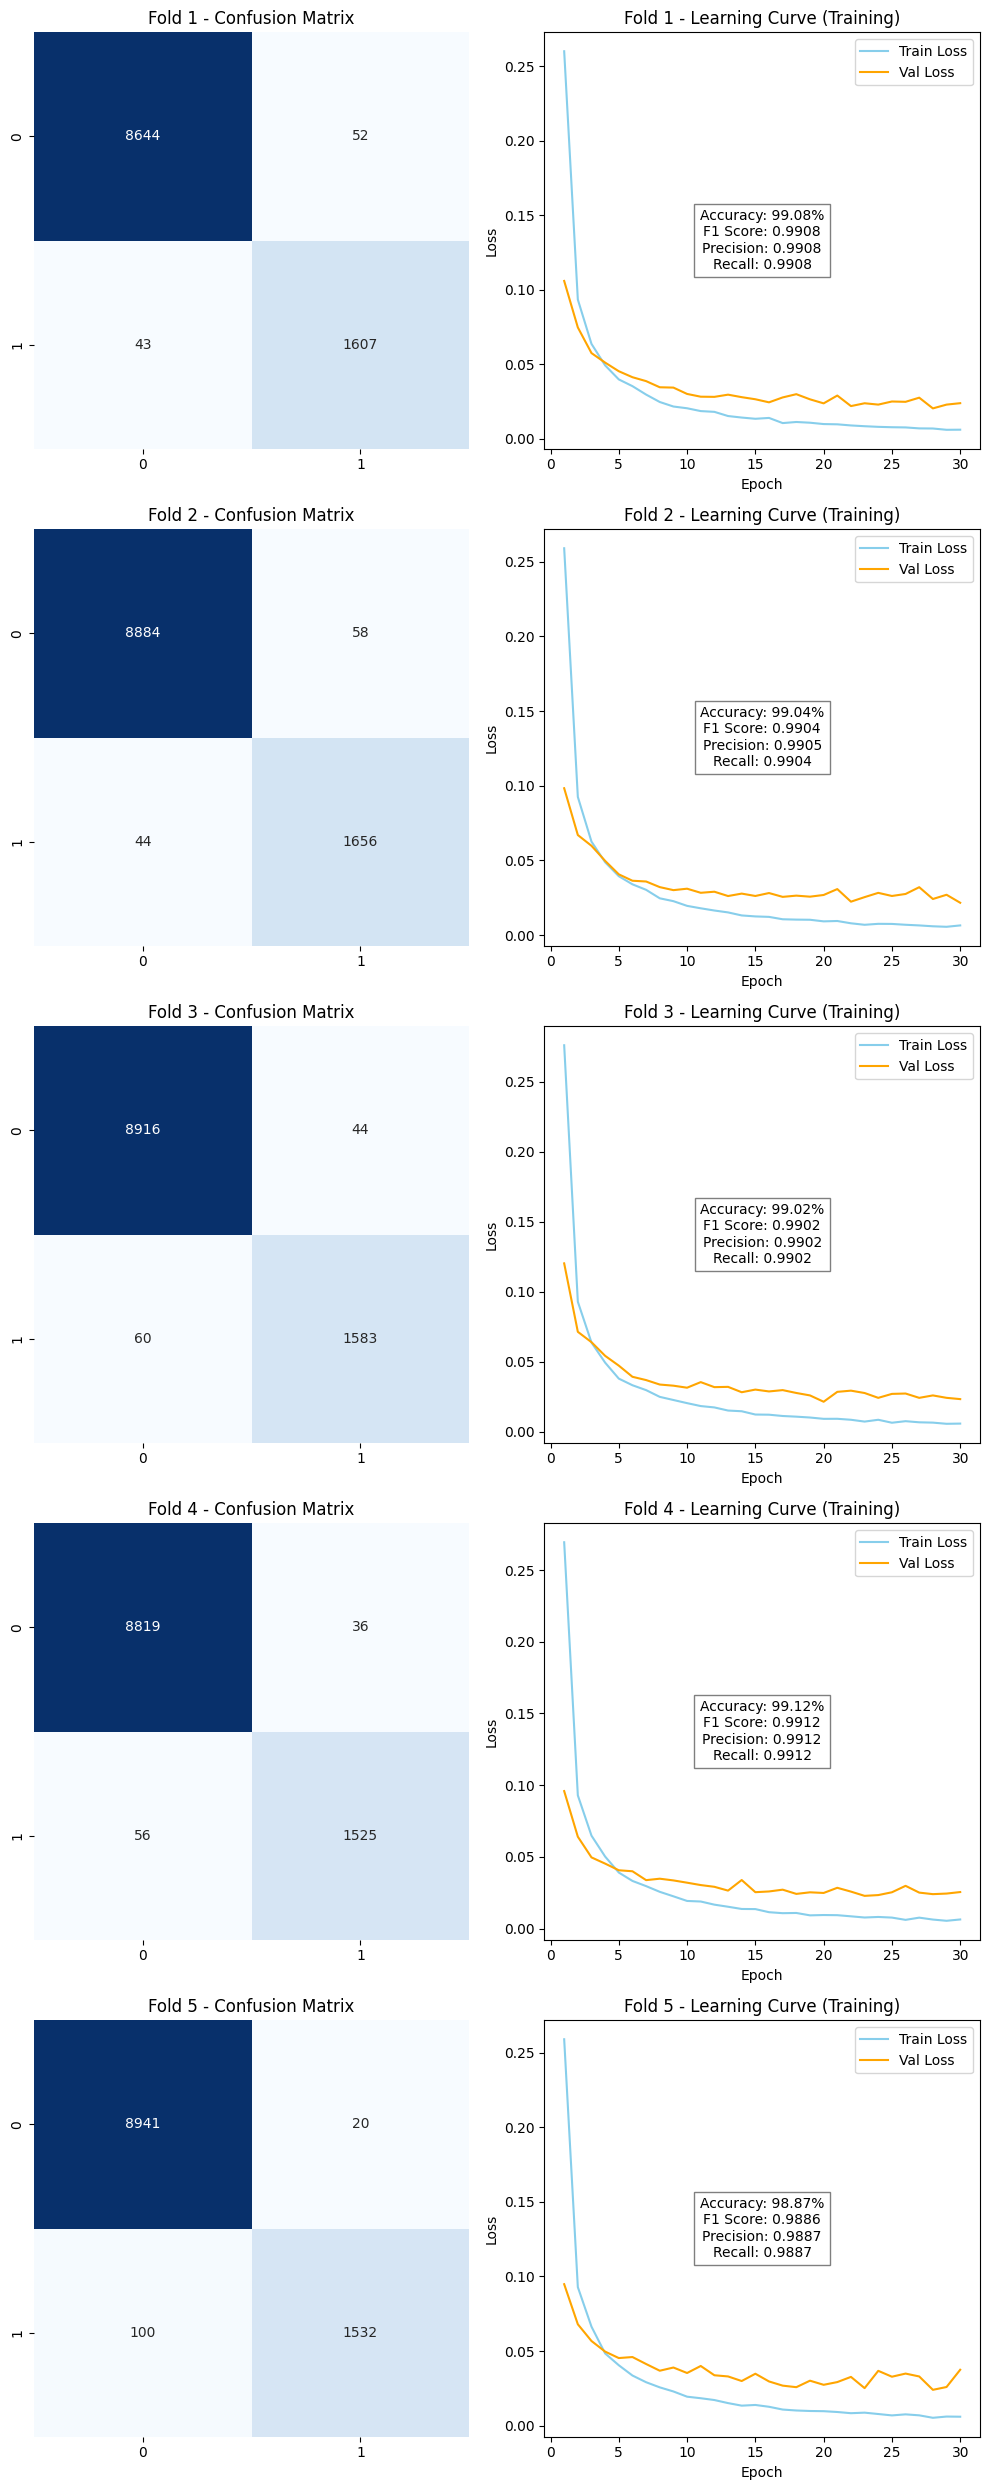

In [30]:
import seaborn as sns

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(10, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = conf_mat_list[fold]
    scores = loss_per_fold[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(all_train_loss[fold]) + 1), all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(all_val_loss[fold]) + 1), all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {f1_per_fold[fold]:.4f}\nPrecision: {precision_per_fold[fold]:.4f}\nRecall: {recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Display the subplots
plt.tight_layout()
plt.show()


## **epoch 50**

In [31]:
label_encoder = LabelEncoder()
data['Group'] = label_encoder.fit_transform(data['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
all_folds = data['Fold'].unique()

accuracy_per_fold = []
conf_mat_list = []

precision_per_fold = []
recall_per_fold = []
f1_per_fold = []

loss_per_fold = []
all_train_loss = []
all_val_loss = []

# Create an instance of SMOTE
smote = SMOTE()

In [32]:
for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Apply SMOTE only on the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # scale
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # encode y_train and y_test
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_resampled)
    y_test_encoded = label_encoder.transform(y_test)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=2)

    model = Sequential([
        Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train_one_hot,
                        batch_size=500,
                        epochs=50,
                        verbose=0,
                        validation_data=(X_test_scaled, y_test_one_hot))

    # Evaluate on train set
    scores = model.evaluate(X_test_scaled, y_test_one_hot, verbose=0)
    loss_per_fold.append(scores[0])

    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

    y_pred = model.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)
    conf_mat = confusion_matrix(y_test_encoded, y_pred_classes)
    conf_mat_list.append(conf_mat)


    accuracy = accuracy_score(y_test_encoded, y_pred_classes)
    precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
    recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')

    accuracy_per_fold.append(accuracy)
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_per_fold.append(f1)

    print(f"Fold {fold + 1} - Loss: {loss_per_fold[-1]:.4f}, Accuracy: {accuracy_per_fold[-1]*100:.2f}%")
    print(f"Precision: {precision_per_fold[-1]:.4f}, Recall: {recall_per_fold[-1]:.4f}, F1-Score: {f1_per_fold[-1]:.4f}")

332/332 [==============================] - 1s 3ms/step
Fold 1 - Loss: 0.0268, Accuracy: 99.12%
Precision: 0.9912, Recall: 0.9912, F1-Score: 0.9912
332/332 [==============================] - 1s 1ms/step
Fold 2 - Loss: 0.0241, Accuracy: 99.28%
Precision: 0.9928, Recall: 0.9928, F1-Score: 0.9928
324/324 [==============================] - 1s 2ms/step
Fold 3 - Loss: 0.0221, Accuracy: 99.32%
Precision: 0.9932, Recall: 0.9932, F1-Score: 0.9932
327/327 [==============================] - 1s 1ms/step
Fold 4 - Loss: 0.0253, Accuracy: 99.11%
Precision: 0.9911, Recall: 0.9911, F1-Score: 0.9911
333/333 [==============================] - 1s 2ms/step
Fold 5 - Loss: 0.0234, Accuracy: 99.14%
Precision: 0.9915, Recall: 0.9914, F1-Score: 0.9915


In [33]:
from collections import Counter

print("Class distribution in y_train_resampled:", Counter(y_train_resampled))
print("Class distribution in y_test:", Counter(y_test))

Class distribution in y_train_resampled: Counter({0: 35472, 1: 35472})
Class distribution in y_test: Counter({0: 8942, 1: 1700})


In [34]:
y_pred

array([[9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 1.1059918e-22],
       [9.9999994e-01, 5.7268270e-25],
       ...,
       [9.9999994e-01, 0.0000000e+00],
       [1.0000000e+00, 3.7832645e-34],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [35]:
y_test_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0])

### **plot**

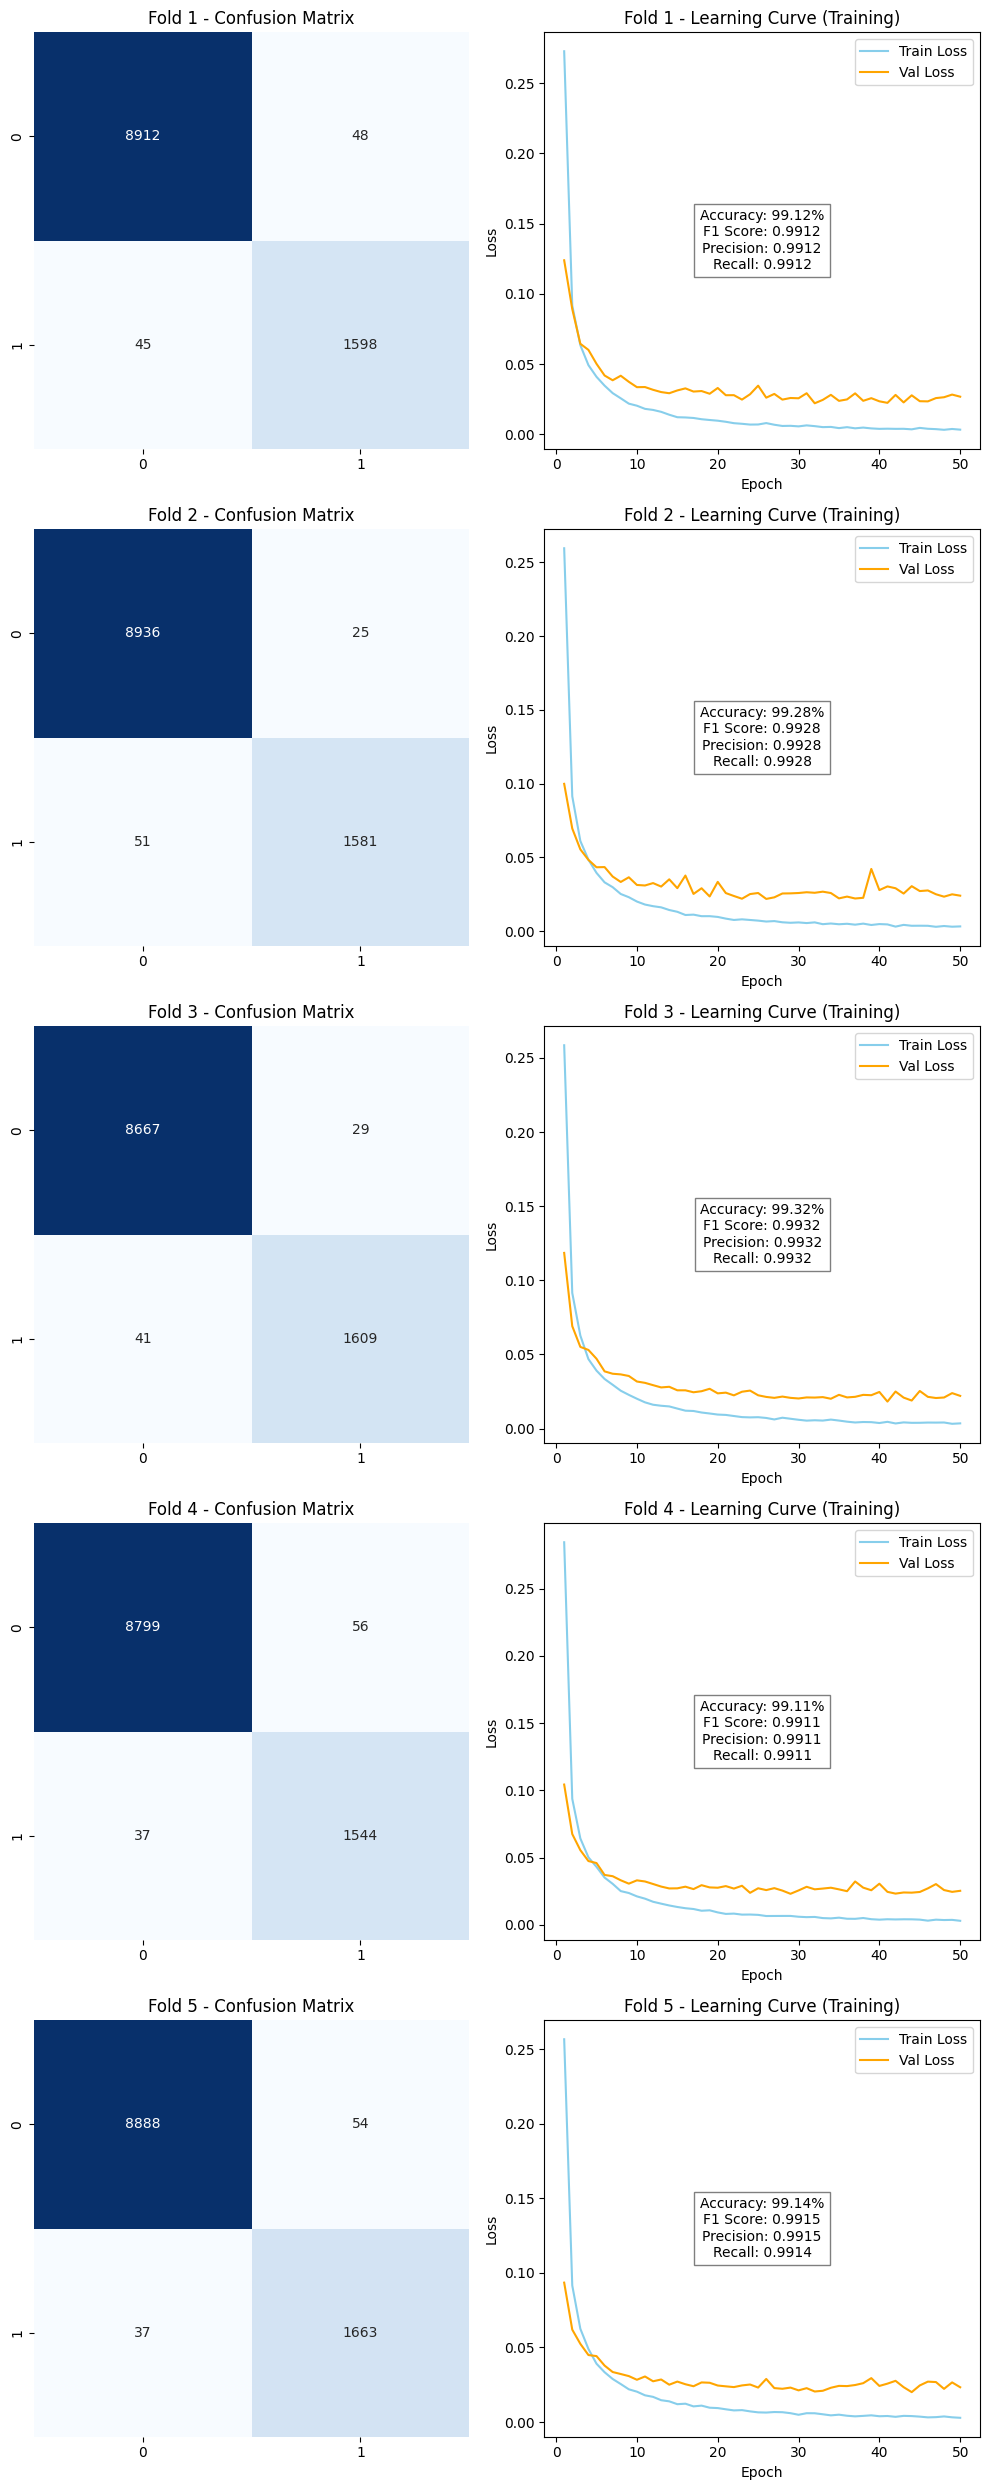

In [37]:
import seaborn as sns

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(10, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = conf_mat_list[fold]
    scores = loss_per_fold[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(all_train_loss[fold]) + 1), all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(all_val_loss[fold]) + 1), all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {f1_per_fold[fold]:.4f}\nPrecision: {precision_per_fold[fold]:.4f}\nRecall: {recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Display the subplots
plt.tight_layout()
plt.show()


## **epoch 100**

In [38]:
label_encoder = LabelEncoder()
data['Group'] = label_encoder.fit_transform(data['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
all_folds = data['Fold'].unique()

accuracy_per_fold = []
conf_mat_list = []

precision_per_fold = []
recall_per_fold = []
f1_per_fold = []

loss_per_fold = []
all_train_loss = []
all_val_loss = []

# Create an instance of SMOTE
smote = SMOTE()

In [39]:
for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Apply SMOTE only on the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # scale
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # encode y_train and y_test
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_resampled)
    y_test_encoded = label_encoder.transform(y_test)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=2)

    model1 = Sequential([
        Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model1.fit(X_train_scaled, y_train_one_hot,
                        batch_size=500,
                        epochs=100,
                        verbose=0,
                        validation_data=(X_test_scaled, y_test_one_hot))

    # Evaluate on train set
    scores = model1.evaluate(X_test_scaled, y_test_one_hot, verbose=0)
    loss_per_fold.append(scores[0])

    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

    y_pred = model.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)
    conf_mat = confusion_matrix(y_test_encoded, y_pred_classes)
    conf_mat_list.append(conf_mat)


    accuracy = accuracy_score(y_test_encoded, y_pred_classes)
    precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
    recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')

    accuracy_per_fold.append(accuracy)
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_per_fold.append(f1)

    print(f"Fold {fold + 1} - Loss: {loss_per_fold[-1]:.4f}, Accuracy: {accuracy_per_fold[-1]*100:.2f}%")
    print(f"Precision: {precision_per_fold[-1]:.4f}, Recall: {recall_per_fold[-1]:.4f}, F1-Score: {f1_per_fold[-1]:.4f}")

327/327 [==============================] - 0s 1ms/step
Fold 1 - Loss: 0.0321, Accuracy: 99.95%
Precision: 0.9995, Recall: 0.9995, F1-Score: 0.9995
324/324 [==============================] - 1s 2ms/step
Fold 2 - Loss: 0.0262, Accuracy: 99.99%
Precision: 0.9999, Recall: 0.9999, F1-Score: 0.9999
333/333 [==============================] - 1s 1ms/step
Fold 3 - Loss: 0.0322, Accuracy: 99.15%
Precision: 0.9916, Recall: 0.9915, F1-Score: 0.9916
332/332 [==============================] - 1s 2ms/step
Fold 4 - Loss: 0.0365, Accuracy: 99.89%
Precision: 0.9989, Recall: 0.9989, F1-Score: 0.9989
332/332 [==============================] - 1s 1ms/step
Fold 5 - Loss: 0.0301, Accuracy: 100.00%
Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000


In [40]:
from collections import Counter

print("Class distribution in y_train_resampled:", Counter(y_train_resampled))
print("Class distribution in y_test:", Counter(y_test))

Class distribution in y_train_resampled: Counter({0: 35454, 1: 35454})
Class distribution in y_test: Counter({0: 8960, 1: 1643})


In [41]:
y_pred

array([[9.9999994e-01, 0.0000000e+00],
       [2.7465285e-15, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.2955185e-31]], dtype=float32)

In [42]:
y_test_encoded

array([0, 1, 0, ..., 0, 0, 0])

In [43]:
y_pred_classes

array([0, 1, 0, ..., 0, 0, 0])

### **plot**

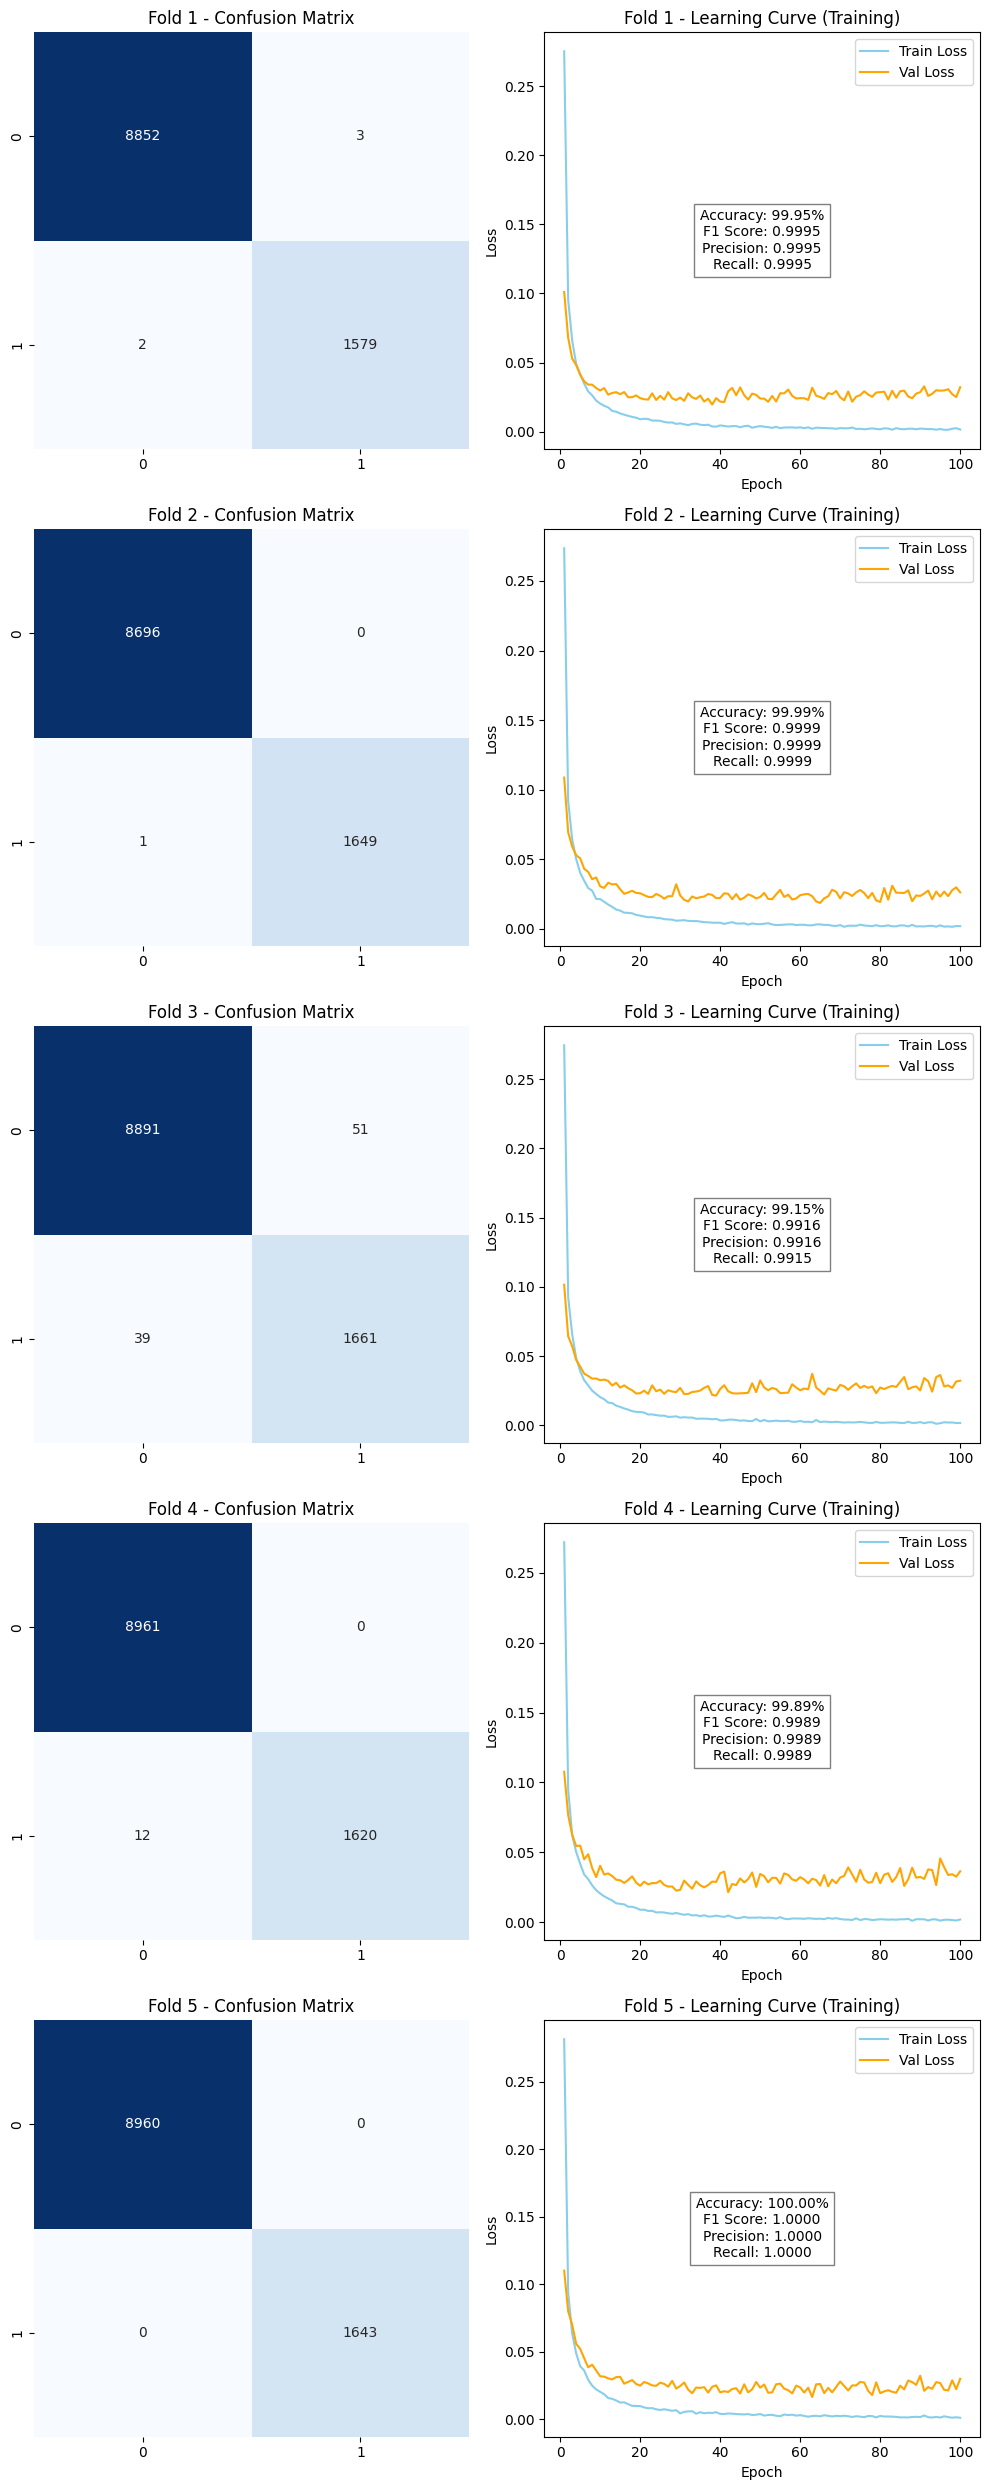

In [44]:
import seaborn as sns

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(10, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = conf_mat_list[fold]
    scores = loss_per_fold[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(all_train_loss[fold]) + 1), all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(all_val_loss[fold]) + 1), all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {f1_per_fold[fold]:.4f}\nPrecision: {precision_per_fold[fold]:.4f}\nRecall: {recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Display the subplots
plt.tight_layout()
plt.show()


## **early stopping**

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
label_encoder = LabelEncoder()
data['Group'] = label_encoder.fit_transform(data['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
all_folds = data['Fold'].unique()

accuracy_per_fold = []
conf_mat_list = []

precision_per_fold = []
recall_per_fold = []
f1_per_fold = []

loss_per_fold = []
all_train_loss = []
all_val_loss = []

# Create an instance of SMOTE
smote = SMOTE()

In [47]:
for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Apply SMOTE only on the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # scale
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # encode y_train and y_test
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_resampled)
    y_test_encoded = label_encoder.transform(y_test)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=2)

    model2 = Sequential([
        Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model2.fit(X_train_scaled, y_train_one_hot,
                        batch_size=500,
                        epochs=20,
                        verbose=0,
                        validation_data=(X_test_scaled, y_test_one_hot),
                        callbacks=[early_stopping])

    # Evaluate on train set
    scores = model2.evaluate(X_test_scaled, y_test_one_hot, verbose=0)
    loss_per_fold.append(scores[0])

    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

    y_pred = model2.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)
    conf_mat = confusion_matrix(y_test_encoded, y_pred_classes)
    conf_mat_list.append(conf_mat)


    accuracy = accuracy_score(y_test_encoded, y_pred_classes)
    precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
    recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')

    accuracy_per_fold.append(accuracy)
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_per_fold.append(f1)

    print(f"Fold {fold + 1} - Loss: {loss_per_fold[-1]:.4f}, Accuracy: {accuracy_per_fold[-1]*100:.2f}%")
    print(f"Precision: {precision_per_fold[-1]:.4f}, Recall: {recall_per_fold[-1]:.4f}, F1-Score: {f1_per_fold[-1]:.4f}")

333/333 [==============================] - 1s 1ms/step
Fold 1 - Loss: 0.0265, Accuracy: 98.90%
Precision: 0.9891, Recall: 0.9890, F1-Score: 0.9890
332/332 [==============================] - 1s 1ms/step
Fold 2 - Loss: 0.0241, Accuracy: 98.94%
Precision: 0.9895, Recall: 0.9894, F1-Score: 0.9895
327/327 [==============================] - 1s 1ms/step
Fold 3 - Loss: 0.0251, Accuracy: 99.01%
Precision: 0.9901, Recall: 0.9901, F1-Score: 0.9901
324/324 [==============================] - 1s 1ms/step
Fold 4 - Loss: 0.0226, Accuracy: 99.18%
Precision: 0.9918, Recall: 0.9918, F1-Score: 0.9918
332/332 [==============================] - 1s 2ms/step
Fold 5 - Loss: 0.0324, Accuracy: 98.57%
Precision: 0.9857, Recall: 0.9857, F1-Score: 0.9856


In [48]:
from collections import Counter

print("Class distribution in y_train_resampled:", Counter(y_train_resampled))
print("Class distribution in y_test:", Counter(y_test))

Class distribution in y_train_resampled: Counter({0: 35453, 1: 35453})
Class distribution in y_test: Counter({0: 8961, 1: 1632})


In [49]:
y_pred

array([[9.9999994e-01, 7.3215238e-29],
       [9.9999994e-01, 6.6010114e-10],
       [9.9999994e-01, 2.9441155e-20],
       ...,
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [1.0000000e+00, 9.5358131e-15]], dtype=float32)

In [50]:
y_test_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0])

### **plot**

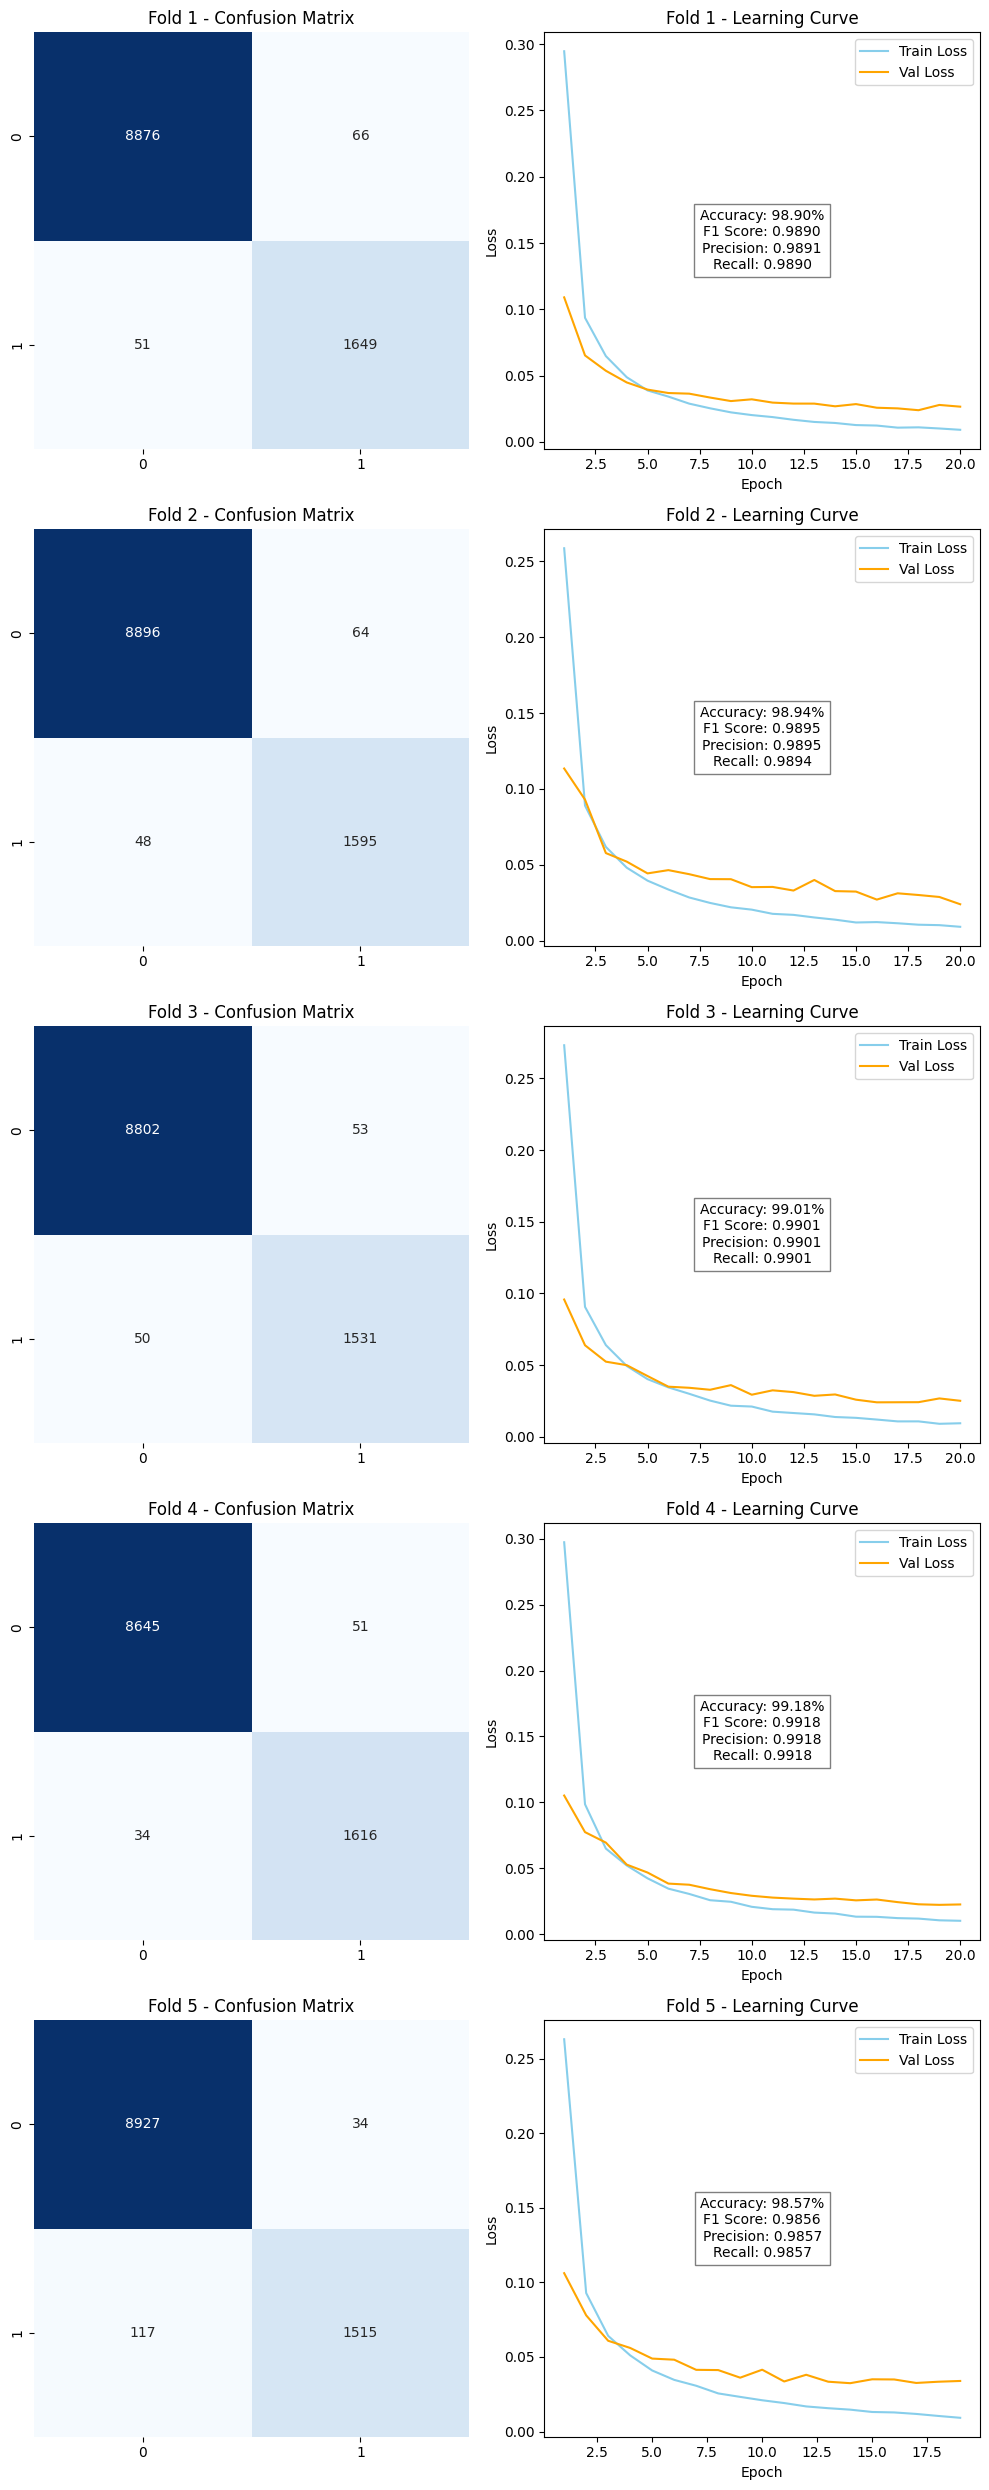

In [58]:
import seaborn as sns

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(10, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = conf_mat_list[fold]
    scores = loss_per_fold[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(all_train_loss[fold]) + 1), all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(all_val_loss[fold]) + 1), all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {f1_per_fold[fold]:.4f}\nPrecision: {precision_per_fold[fold]:.4f}\nRecall: {recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Display the subplots
plt.tight_layout()
plt.show()


# **Re-Sampling Distribution**

In [53]:
pip install imbalanced-learn matplotlib seaborn

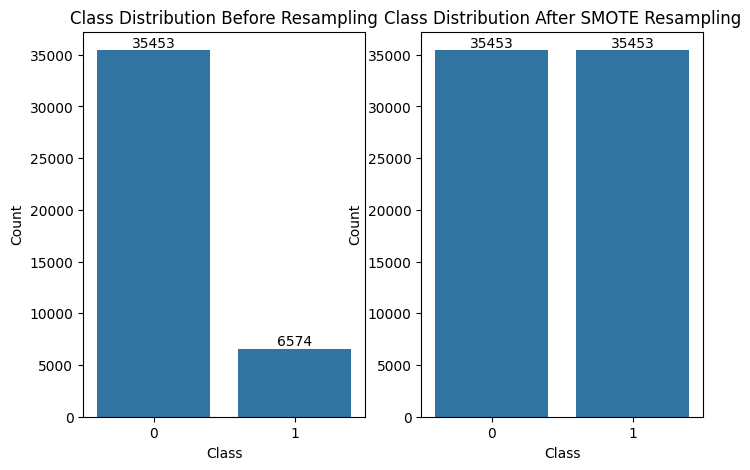

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

counter_before = Counter(y_train)
counter_after = Counter(y_train_resampled)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

for i, count in enumerate(counter_before.values()):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

# Plot after resampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

for i, count in enumerate(counter_after.values()):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.show()


In [59]:
print(X_train.shape)
print(X_train_resampled.shape)
print(y_train.shape)
print(y_train_resampled.shape)

(42027, 80)
(70906, 80)
(42027,)
(70906,)
